Saving FEATURES.csv.csv to FEATURES.csv (1).csv


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib

[0]Logistic Regression Training Accuracy:  0.936231884057971
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  1.0
[3]Support Vector Machine (Linear) Training Accuracy:  0.9420289855072463
[4]Support Vector Machine (radial_basis_function) Training Accuracy:  0.9855072463768116
[5]Naive  Bayes Training Accuracy:  0.5217391304347826
[6]K_Nearest Neighbors Classifier Training Accuracy:  0.9884057971014493
Model 0
[[49 10]
 [ 4 86]]
Testing Accuracy =  0.9060402684563759

Model 1
[[57  2]
 [ 2 88]]
Testing Accuracy =  0.9731543624161074

Model 2
[[44 15]
 [ 5 85]]
Testing Accuracy =  0.8657718120805369

Model 3
[[47 12]
 [ 2 88]]
Testing Accuracy =  0.9060402684563759

Model 4
[[50  9]
 [ 2 88]]
Testing Accuracy =  0.9261744966442953

Model 5
[[ 0 59]
 [ 0 90]]
Testing Accuracy =  0.6040268456375839

Model 6
[[53  6]
 [ 2 88]]
Testing Accuracy =  0.9463087248322147

Model 0
              precision    recall  f1-score   support

           0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


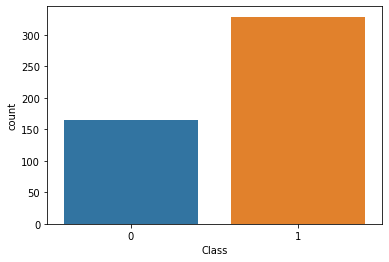

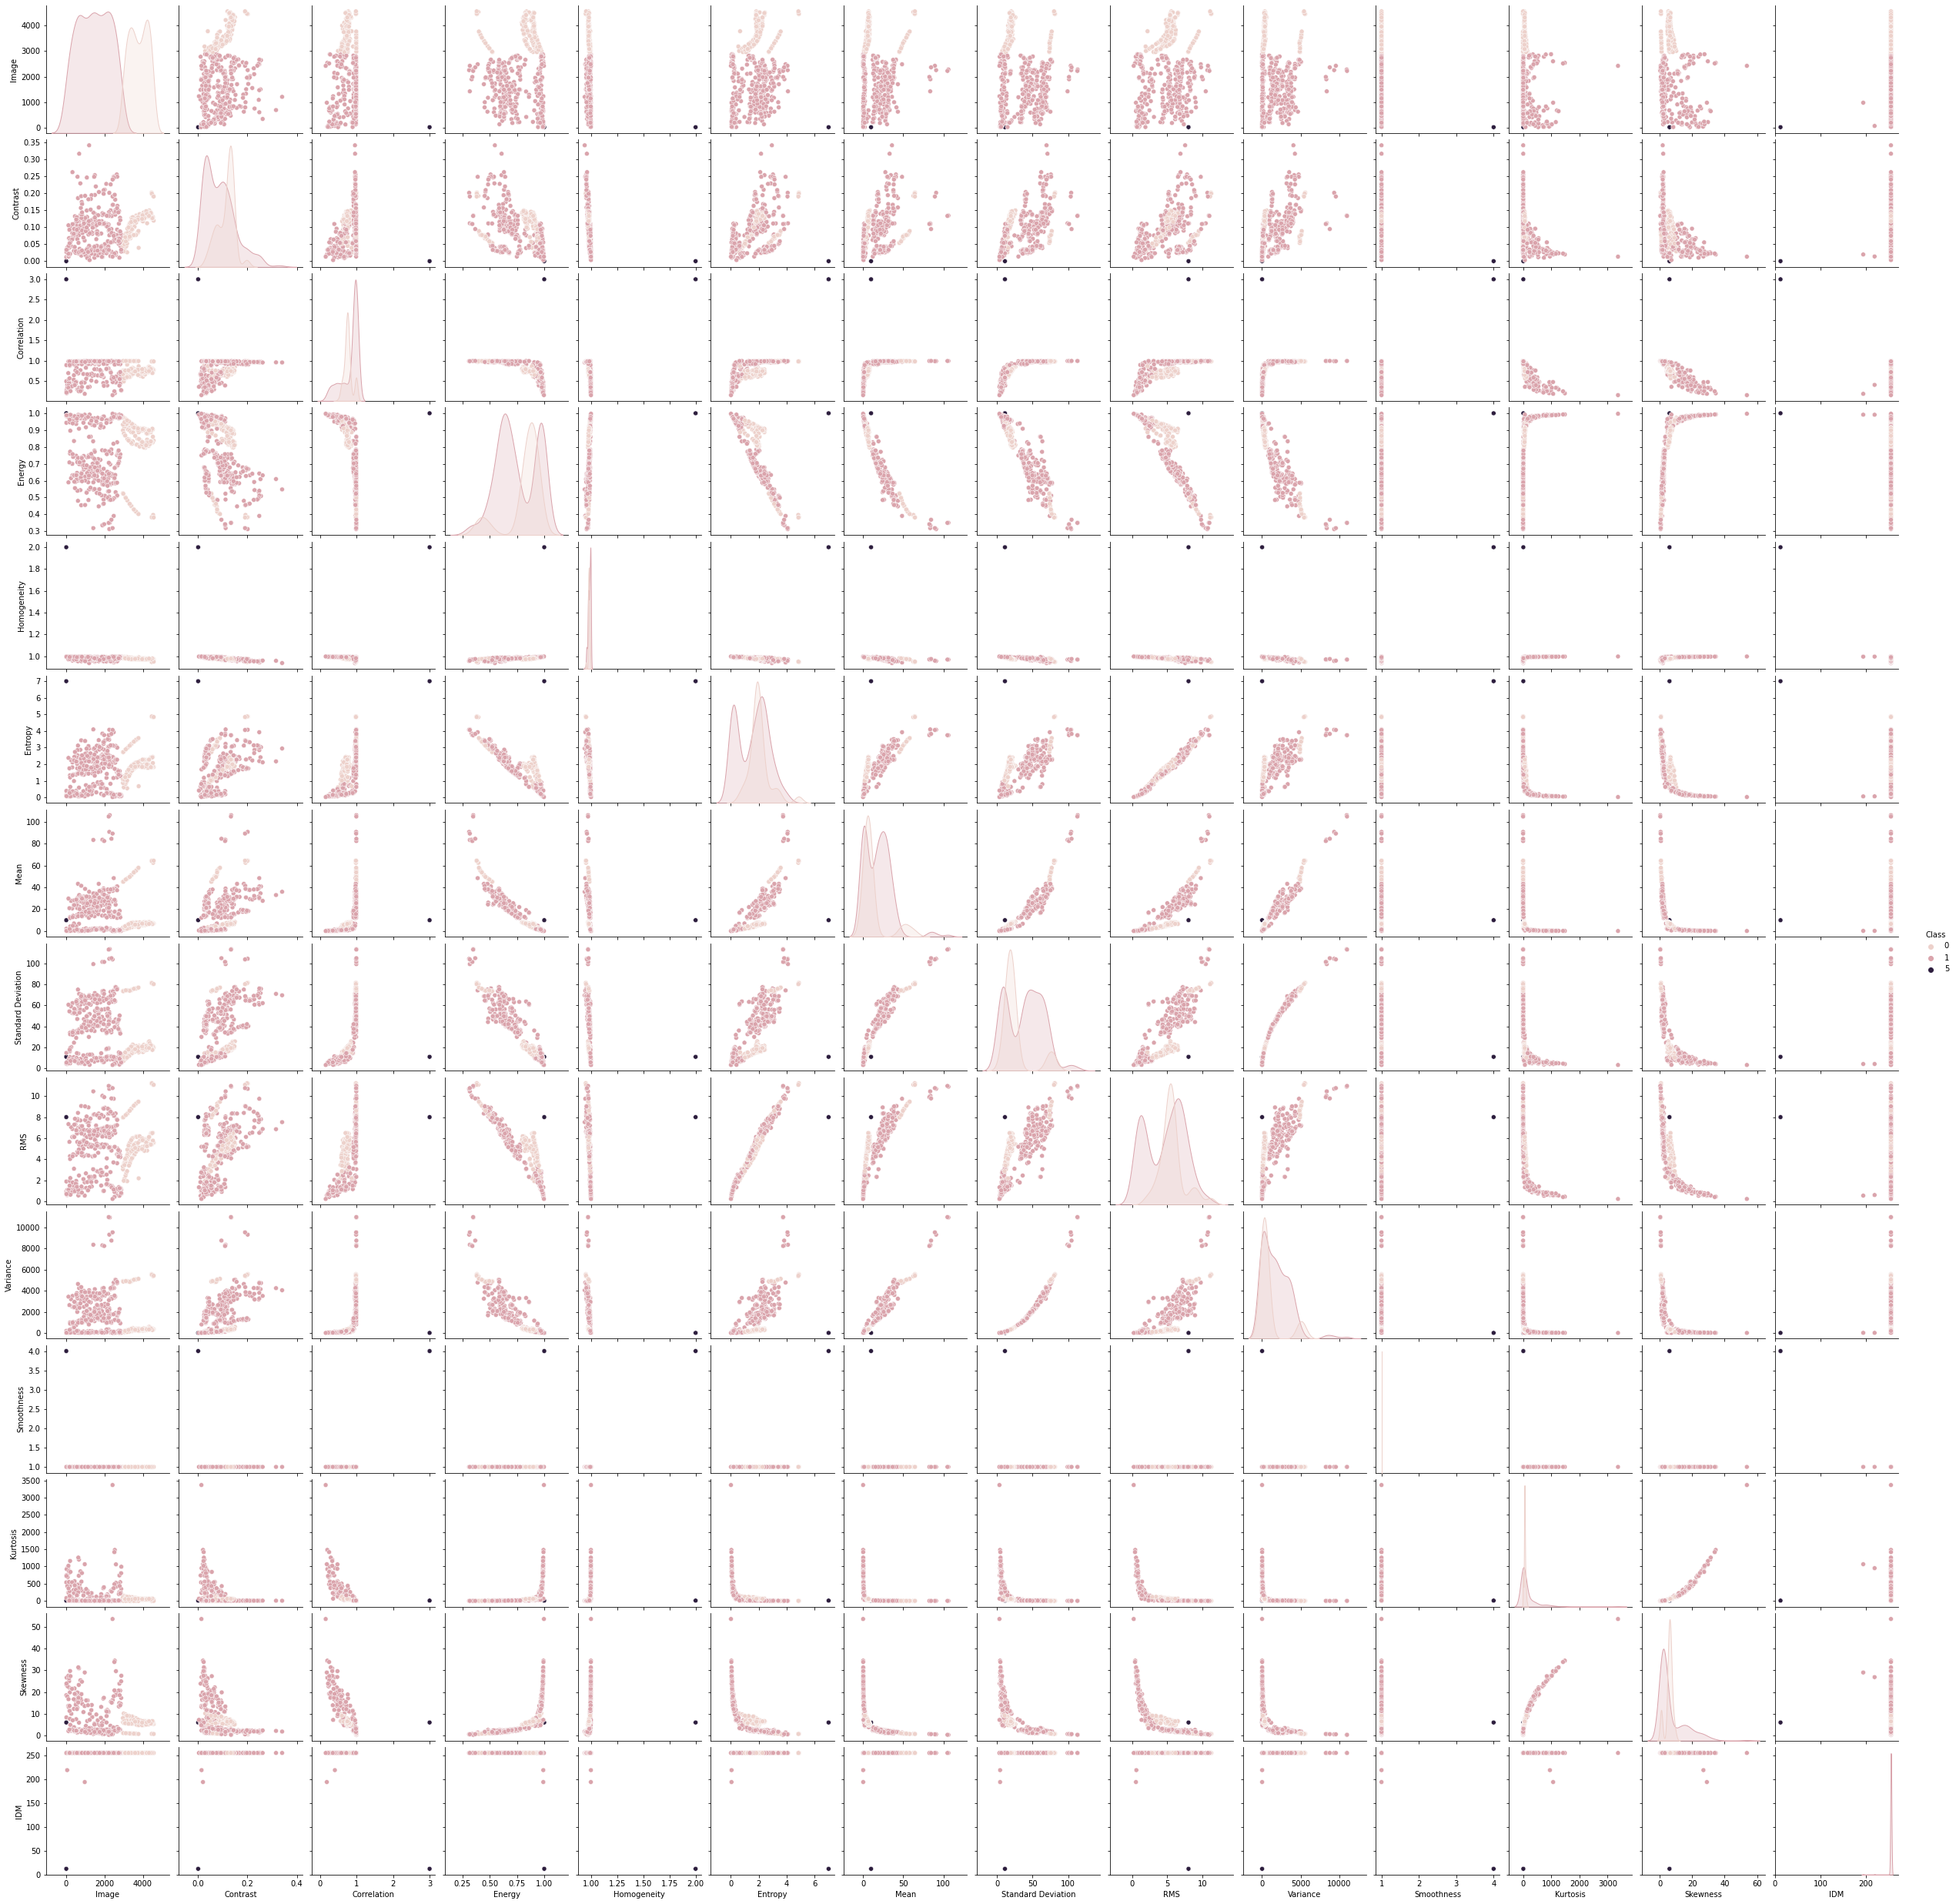

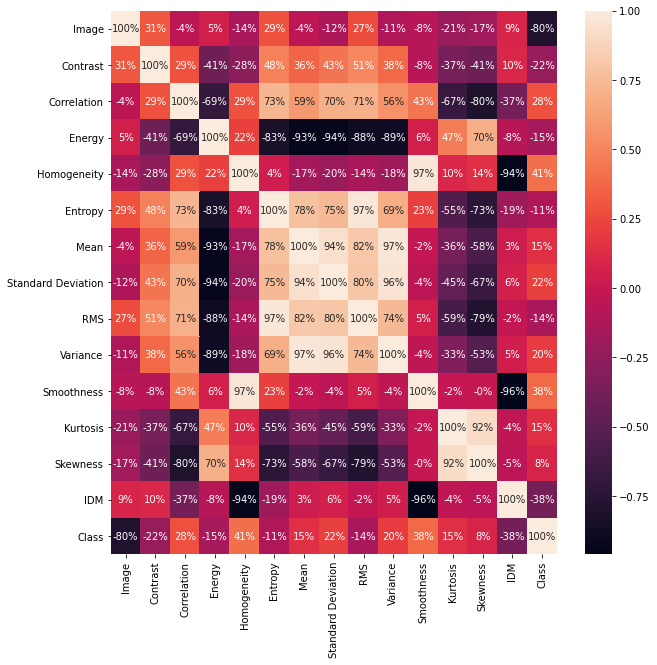

In [ ]:
# -*- coding: utf-8 -*-
"""Classification.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1RNp6fw7dj06XDe8_lELcKY82dSGuGFee
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('FEATURES.csv.csv')
df.head(7)

df.shape

df.isna().sum()

df = df.dropna(axis=0)

df.head(7)

df.shape

# Get the count of cancerous and non-cancerous
df['Class'].value_counts()
df.head()

# Visualize the count
sns.countplot(df['Class'], label = 'Count')

# Look at the datatypes 
df.dtypes

# Encode the cayegorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[14] =  labelencoder_Y.fit_transform(df.iloc[14].values)

#Create a pair plot
sns.pairplot(df, hue = 'Class')

df.head(5)

# Get the correlation of the columns
df.corr()

# Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

#Split the dataset into independent(X) and dependent column (Y) dataset
X = df.iloc[:, 1:14].values
Y = df.iloc[:, 14].values

#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Create a function for models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forrest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Support Vector Machine(linear)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Support Vector Machine(radial_basis_function [RBF])
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Naive Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #K_Nearest Neighbours Classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
  knn.fit(X_train, Y_train)


  #Print the given models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
  print('[3]Support Vector Machine (Linear) Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[4]Support Vector Machine (radial_basis_function) Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[5]Naive  Bayes Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[6]K_Nearest Neighbors Classifier Training Accuracy: ', knn.score(X_train, Y_train))

  return log, tree, forest, svc_lin, svc_rbf, gauss, knn

model = models(X_train, Y_train)

#test model accuracy of test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()
